In [1]:
import numpy as  np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
data= pd.read_csv("E:\Churn_Modelling.csv")
data.head(8)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


In [3]:
data.info


<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age   
0             1    15634602   Hargrave          619    France  Female   42  \
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [4]:
df = data.copy()

In [5]:
gender= pd.get_dummies(df['Gender'],drop_first=True)
geo=pd.get_dummies(df['Geography'],drop_first=True)

In [6]:
df= pd.concat((df,gender,geo),axis=1)


In [7]:
cat_features = ['Spain','Germany','Male','NumOfProducts','HasCrCard','IsActiveMember']
num_features = ['Tenure','Balance','EstimatedSalary','Age','CreditScore']

In [8]:
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Male               0
Germany            0
Spain              0
dtype: int64

In [9]:
df = df.drop(['Gender','Geography'],axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
Remove = ['RowNumber', 'CustomerId', 'Surname','EstimatedSalary','HasCrCard','CreditScore','Germany']

In [12]:
df = df.drop(Remove,axis=1)

In [13]:
sc = StandardScaler()

In [14]:
df['Balance']= sc.fit_transform(df[['Balance']])
df['Age'] = sc.fit_transform(df[['Age']])

In [15]:
Y = df[['Exited']]
X = df.drop(['Exited'],axis=1)

In [16]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=1234,stratify=Y)

In [17]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state=42)  

In [18]:
model = LogisticRegression()

In [19]:
model1.fit(X_train,Y_train)
Y_predict = model1.predict(X_test)

C:\Users\Saran G\AppData\Local\Temp\ipykernel_11832\981038223.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(X_train,Y_train)


In [20]:
cm = confusion_matrix(Y_test,Y_predict)
cm

array([[2238,  151],
       [ 318,  293]], dtype=int64)

In [21]:
model1.score(X_test,Y_test)

0.8436666666666667

In [22]:
df = pd.read_csv('E:\Churn_Modelling.csv')
df.drop(['RowNumber','CustomerId'],inplace=True,axis=1)

In [23]:
X = df.iloc[:,1:10]
y=df.iloc[:,11]
gender= pd.get_dummies(df['Gender'],drop_first=True)
geo=pd.get_dummies(df['Geography'],drop_first=True)
X=pd.concat([X,geo,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=100)

sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

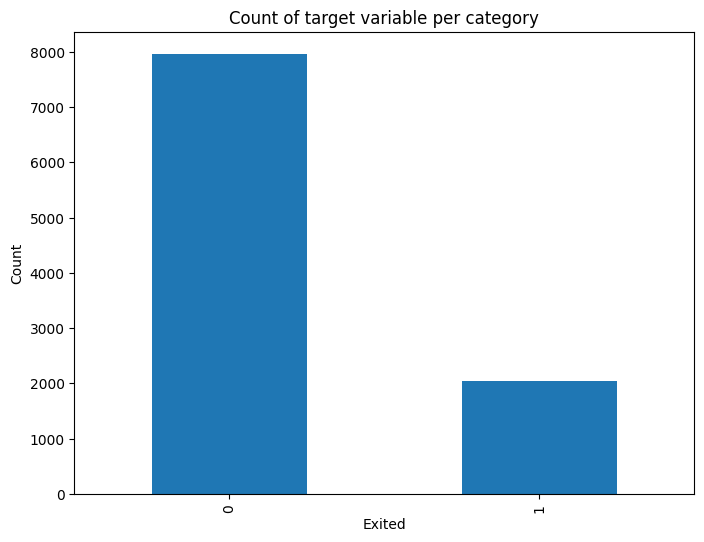

In [25]:
import matplotlib.pyplot as plt


data['Exited'].value_counts().plot(kind='bar',figsize=(8,6))
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Count of target variable per category')
plt.show()

In [26]:
print(100 * data['Exited'].value_counts()/len(data))

Exited
0    79.63
1    20.37
Name: count, dtype: float64


In [27]:
features_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1]

for feature in features_with_nan:
    print(feature,np.round(data[feature].isnull().mean(),4),' % Missing Values')

In [28]:
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [29]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!='O']
print('Number of numerical features: ',len(numerical_features))
print(data[numerical_features].head())

Number of numerical features:  9
   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard   
0          619   42       2       0.00              1          1  \
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0  


In [31]:
discrete_numerical_features=[feature for feature in numerical_features if len(data[feature].unique())<20]
print('Number of numerical features: ',len(discrete_numerical_features))
print(data[discrete_numerical_features].head())

Number of numerical features:  5
   Tenure  NumOfProducts  HasCrCard  IsActiveMember  Exited
0       2              1          1               1       1
1       1              1          0               1       0
2       8              3          1               0       1
3       1              2          0               0       0
4       2              1          1               1       0


In [32]:
continuous_numerical_features=[feature for feature in numerical_features if len(data[feature].unique())>20]
print('Number of continuous features: ',len(continuous_numerical_features))
print(data[continuous_numerical_features].head())

Number of continuous features:  4
   CreditScore  Age    Balance  EstimatedSalary
0          619   42       0.00        101348.88
1          608   41   83807.86        112542.58
2          502   42  159660.80        113931.57
3          699   39       0.00         93826.63
4          850   43  125510.82         79084.10


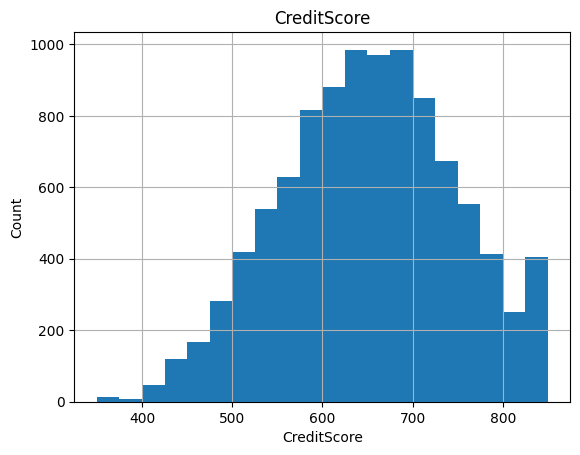

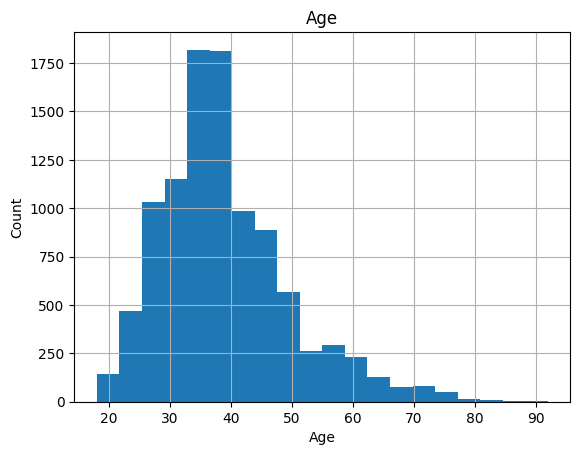

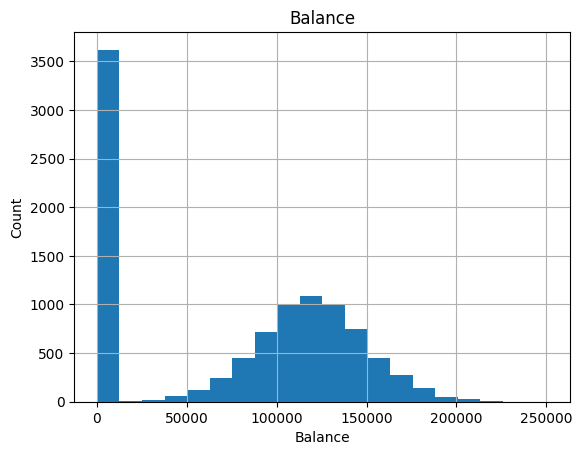

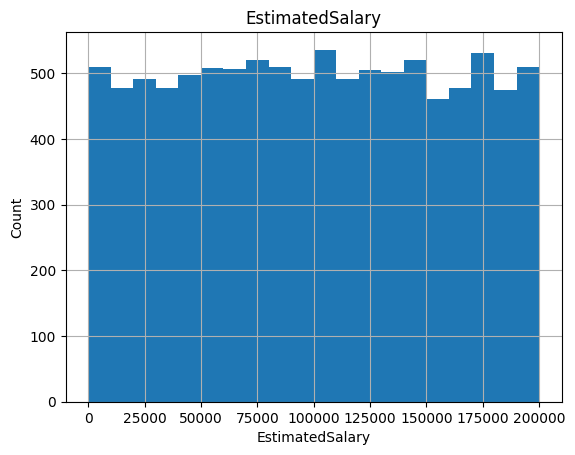

In [33]:
for feature in continuous_numerical_features:
    df=data.copy()
    df[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

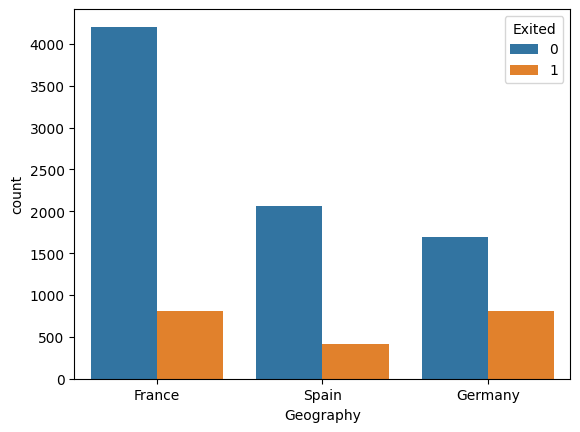

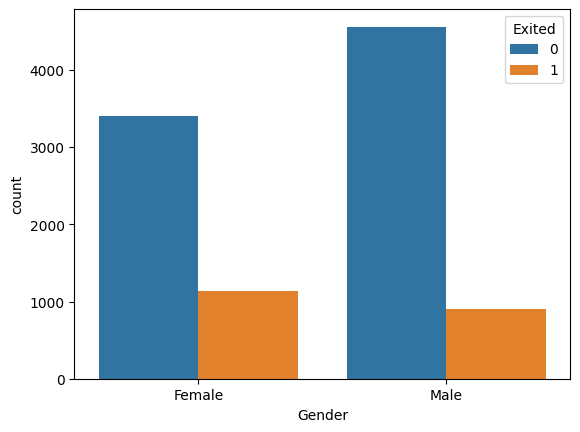

In [34]:
import seaborn as sns
cat_data=data[['Geography','Gender']]
for i ,predictor in enumerate(cat_data):
    plt.figure(i)
    sns.countplot(data=data, x=predictor,hue='Exited')

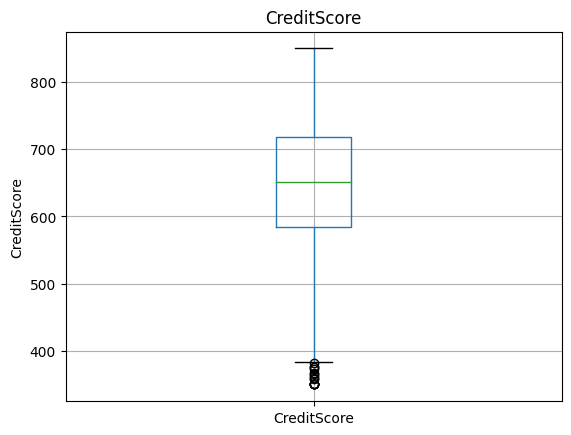

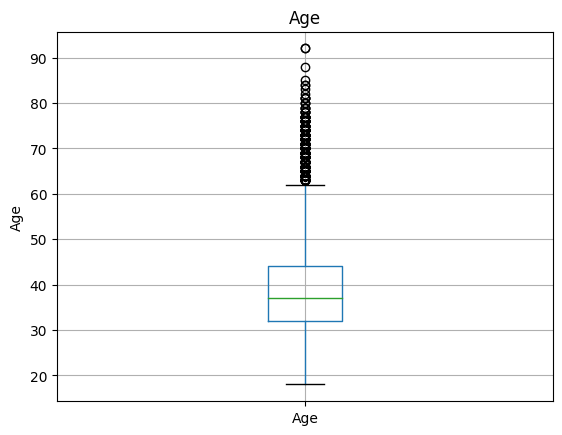

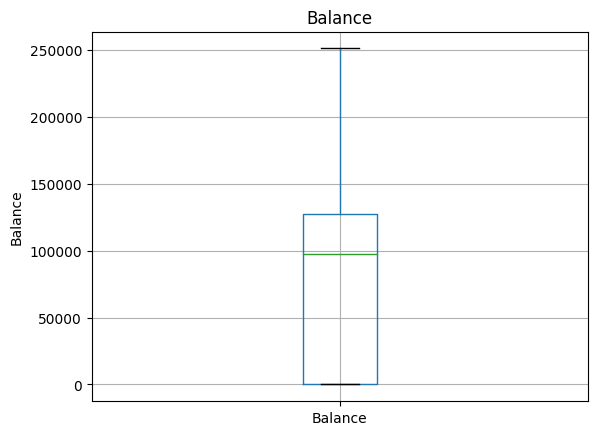

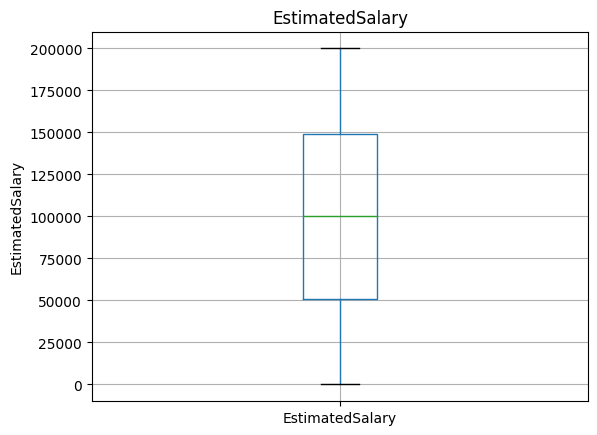

In [35]:
for feature in continuous_numerical_features:
    df=data.copy()
    if 0 in df[feature].unique():
        pass
    df.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [36]:
q1_age =data['Age'].quantile(0.25)
q3_age=data['Age'].quantile(0.75)
iqr_age=q3_age-q1_age
lower=q1_age-(1.5 * iqr_age)
upper=q3_age+(1.5 * iqr_age)
data=data[data['Age']>lower]
data=data[data['Age']<upper]

In [37]:
q1_credit=data['CreditScore'].quantile(0.25)
q3_credit=data['CreditScore'].quantile(0.75)
iqr_credit=q3_credit-q1_credit
lower=q1_credit-(1.5 * iqr_credit)
upper=q3_credit+(1.5 * iqr_credit)
data=data[data['CreditScore']>lower]
data=data[data['CreditScore']<upper]

In [38]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
x=data.iloc[:,0:10].values
y=data.iloc[:,-1].values

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2])], remainder='passthrough')
x=ct.fit_transform(x)

In [41]:
from imblearn.over_sampling import RandomOverSampler
sampler= RandomOverSampler(sampling_strategy=1)
x,y=sampler.fit_resample(x,y)

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=123)

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [44]:
x=data.iloc[:,3:-1].values
y=data.Exited.values

In [45]:
x

array([[4.2000000e+01, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [4.1000000e+01, 1.0000000e+00, 8.3807860e+04, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [4.2000000e+01, 8.0000000e+00, 1.5966080e+05, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [3.6000000e+01, 7.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [4.2000000e+01, 3.0000000e+00, 7.5075310e+04, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [2.8000000e+01, 4.0000000e+00, 1.3014279e+05, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [46]:

y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [47]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
x[:,2]=le.fit_transform(x[:,2])

In [48]:
x

array([[4.2000000e+01, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [4.1000000e+01, 1.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [4.2000000e+01, 8.0000000e+00, 5.5460000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [3.6000000e+01, 7.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [4.2000000e+01, 3.0000000e+00, 4.0400000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [2.8000000e+01, 4.0000000e+00, 3.9340000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[1])],remainder="passthrough")
x=np.array(ct.fit_transform(x))

In [50]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=43)

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain1=sc.fit_transform(xtrain)
xtest1=sc.transform(xtest)

In [52]:
x

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [53]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=43)

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain1=sc.fit_transform(xtrain)
xtest1=sc.transform(xtest)

In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
from sklearn.preprocessing import OneHotEncoder

one = OneHotEncoder()

a= one.fit_transform(x[:,6:7]).toarray()

b= one.fit_transform(x[:,7:8]).toarray()

c= one.fit_transform(x[:,8:9]).toarray()

d= one.fit_transform(x[:,9:10]).toarray()

e= one.fit_transform(x[:,10:11]).toarray()

f= one.fit_transform(x[:,11:12]).toarray()

g= one.fit_transform(x[:,12:13]).toarray()

h= one.fit_transform(x[:,13:14]).toarray()

i= one.fit_transform(x[:,14:15]).toarray()

j= one.fit_transform(x[:,16:17]).toarray()

x=np.delete(x,[6,7,8,9,10,11,12,13,14,16], axis=1)

x=np.concatenate((a,b,c,d,e,f,g,h,i,j,x),axis=1)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smt = SMOTE()

x_resample, y_resample = smt.fit_resample(x,y)

In [ ]:
x_resample


array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 1.]])

In [ ]:

y_resample



array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:

x.shape, x_resample.shape


((9574, 15752), (15292, 15752))

In [ ]:

y.shape, y_resample.shape


((9574,), (15292,))

In [ ]:

data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000
mean,650.740547,37.651556,5.015459,76537.282091,1.530917,0.705557,0.502507,100140.948291,0.201379
std,96.055633,8.639293,2.887850,62419.717368,0.580719,0.455816,0.500020,57510.324746,0.401051
min,383.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51112.885000,0.000000
50%,652.000000,37.000000,5.000000,97245.995000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,717.000000,43.000000,7.000000,127653.825000,2.000000,1.000000,1.000000,149414.455000,0.000000
max,850.000000,61.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample, test_size = 0.2, random_state = 0)


In [ ]:
from sklearn.preprocessing import StandardScaler 



In [ ]:
StandardScaler 

sklearn.preprocessing._data.StandardScaler

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
x_train.shape

(12233, 15752)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_curve,auc,log_loss

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred_proba=model.predict_proba(x_test)[:, 1]
[fpr,tpr,thr]=roc_curve(y_test,y_pred_proba)

print('Train/Test split results:')
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(model.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
print(model.__class__.__name__+" score is  %.2f" % model.score(x_test,y_test))

Train/Test split results:
LogisticRegression accuracy is 0.971
LogisticRegression log_loss is 0.093
LogisticRegression auc is 0.996
LogisticRegression score is  0.97


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model=DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

score=model.score(x_test,y_test)
print(score)

0.6505393919581562


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:

import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units=30, activation='relu', input_dim=40))

In [ ]:
classifier.add(Dense(units=30, activation='relu'))

In [ ]:
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
print (accuracy_score (y_pred,y_test))

print("***ANN Model***")

print("Confusion_Matrix") 

print(confusion_matrix(y_test,y_pred))

print("Classification Report")

print(classification_report(y_test,y_pred))

0.6505393919581562
***ANN Model***
Confusion_Matrix
[[ 457 1052]
 [  17 1533]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.30      0.46      1509
           1       0.59      0.99      0.74      1550

    accuracy                           0.65      3059
   macro avg       0.78      0.65      0.60      3059
weighted avg       0.78      0.65      0.60      3059



In [ ]:
def logreg(x_train,x_test,y_train,y_test):
    lr = LogisticRegression(random_state=0) 
    lr.fit(x_train,y_train)
    y_lr_tr = lr.predict(x_train)
    print(accuracy_score (y_lr_tr,y_train))
    yPred_1r = lr.predict(x_test)

    print("**Logistic Regression**")

    print("Confusion_Matrix")

    print(confusion_matrix (y_test,y_Pred))
    print("Classification Report")

    print(classification_report(y_test,y_pred))

In [ ]:
logreg(x_train,x_test,y_train,y_test)

1.0
**Logistic Regression**
Confusion_Matrix


NameError: name 'y_Pred' is not defined

In [ ]:
def decisionTree(x_train,x_test,y_train,y_test):

    dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)

    dtc.fit(x_train,y_train)

    y_dt_tr = dtc.predict(x_train) 

    print(accuracy_score(y_dt_tr,y_train))

    ypred_dt = dtc.predict(x_test) 

    print (accuracy_score(yPred_dt,y_test))

    print("***Decision Tree***")

    print("Confusion_Matrix")

    print(confusion_matrix(y_test,yPred_dt))

    print("classification Report")

    print(classification_report(y_test,yPred_dt))

In [ ]:
decisionTree(x_train,x_test,y_train,y_test)

KeyboardInterrupt: 

In [ ]:
def RandomForest(x_tarin,x_test,y_train,y_test):
  
    rf = RandomForestClassifier(criterion="entropy",n_estimators=10, random_state=0) 
    rf.fit(x_train,y_train)

    y_rf_tr = rf.predict(x_train)

    print(accuracy_score(y_rf_tr,y_train))

    yPred_rf = rf.predict(x_test)

    print (accuracy_score (yPred_rf,y_test)) 
    print("***Random Forest***")

    print("Confusion_Matrix")

    print(confusion_matrix(y_test,yPred_rf))

    print("Classification Report")

    print(classification_report(y_test,yPred_rf))

In [ ]:

RandomForest(x_train,x_test,y_train,y_test)

0.9928063434970981
0.7953579601176856
***Random Forest***
Confusion_Matrix
[[ 966  543]
 [  83 1467]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.64      0.76      1509
           1       0.73      0.95      0.82      1550

    accuracy                           0.80      3059
   macro avg       0.83      0.79      0.79      3059
weighted avg       0.82      0.80      0.79      3059



In [ ]:
def KNeighborsClassifier(x_train,x_test,y_train,y_test): 
    KNN = KNeighborsClassifier(criterion="entropy",n_estimators=10, random_state=0)  
    KNN.fit(x_train,y_train) 
    y_KNN_tr = knn.predict(x_train) 
    print(accuracy_score (y_KNN_tr,y_train)) 
    yPred_KNN = knn.predict(x_test)  
    print(accuracy_score (yPred_KNN,y_test)) 
    print("***KNN***") 

    print("Confusion_Matrix")

    print(confusion_matrix(y_test,yPred_KNN))

    print("Classification Report")

    print(classification_report(y_test,yPred_KNN))

In [ ]:
def KNN(KNeighborsClassifier):
    KNN = KNeighborsClassifier

In [ ]:
def supportvectormachine(x_tarin,x_test,y_train,y_test):
    svm = SVC (kernel = "linear")

    svm.fit(x_train,y_train)

    y_svm_tr = svm.predict(x_train)

    print(accuracy_score (y_svm_tr,y_train))

    yPred_svm = svm.predict(x_test)

    print(accuracy_score(yPred_svm,y_test))

    print("***Support Vector Machine***")

    print("Confusion_Matrix")

    print(confusion_matrix(y_test,yPred_svm))

    print("Classification Report")

    print(classification_report(y_test,yPred_svm))  
 

  

   

In [ ]:
def compareModel(X_train,X_test,y_train,y_test): 

    logreg(x_train,x_test,y_train,y_test)

    print('-'*100)

    decisionTree(x_train,x_test,y_train,y_test) 

    print('-'*100)

    RandomForest(x_train,x_test,y_train,y_test) 

    print('-'*100)

    svm(X_train,x_test,y_train,y_test) 

    print('-'*100)

    KNN(X_train,X_test,y_train,y_test) 

    print('-'*100)

In [ ]:
compareModel(x_train,x_test,y_train,y_test)

1.0
**Logistic Regression**
Confusion_Matrix


NameError: name 'y_Pred' is not defined

In [ ]:
classifier.save("telcom_churn.h5")